In [5]:
import time
import sys
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split, KFold
import multiprocessing
import os
from scipy import sparse
from patsy import dmatrix

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr, pearsonr
from sklearn import ensemble

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy as sp

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [1]:
result = pd.read_csv('train_daydata_result_matrix.csv', sep=',')
result

date  store_nbr  station_nbr  item_nbr  units  tmax  tmin  tavg  \
0       2012-01-01        1.0          1.0       9.0   29.0  52.0  31.0  42.0   
1       2012-01-01        1.0          1.0      28.0    2.0  52.0  31.0  42.0   
2       2012-01-01        1.0          1.0      51.0    1.0  52.0  31.0  42.0   
3       2012-01-01        2.0         14.0       5.0  191.0  50.0  34.0  42.0   
4       2012-01-01        2.0         14.0      44.0  215.0  50.0  34.0  42.0   
5       2012-01-01        6.0         14.0       9.0   44.0  50.0  34.0  42.0   
6       2012-01-01        6.0         14.0      45.0   86.0  50.0  34.0  42.0   
7       2012-01-01       38.0         14.0       9.0  195.0  50.0  34.0  42.0   
8       2012-01-01       38.0         14.0      45.0  135.0  50.0  34.0  42.0   
9       2012-01-01       42.0         14.0       5.0  154.0  50.0  34.0  42.0   
10      2012-01-01       42.0         14.0      45.0   98.0  50.0  34.0  42.0   
11      2012-01-01        3.0          7.0       5.0  214.0  50.0  33.0  42.0   
12      2012-01-01        3.0          7.0      45.0  112.0  50.0  33.0  42.0   
13      2012-01-01       20.0          7.0       5.0  165.0  50.0  33.0  42.0   
14      2012-01-01       20.0          7.0      41.0   37.0  50.0  33.0  42.0   
15      2012-01-01       20.0          7.0      74.0    5.0  50.0  33.0  42.0   
16      2012-01-01       28.0          7.0       5.0   65.0  50.0  33.0  42.0   
17      2012-01-01       28.0          7.0      45.0   68.0  50.0  33.0  42.0   
18      2012-01-01        4.0          9.0       9.0   61.0  34.0  19.0  27.0   
19      2012-01-01        4.0          9.0      27.0   21.0  34.0  19.0  27.0   
20      2012-01-01       24.0          9.0       6.0   42.0  34.0  19.0  27.0   
21      2012-01-01       24.0          9.0      43.0   72.0  34.0  19.0  27.0   
22      2012-01-01       24.0          9.0      60.0    1.0  34.0  19.0  27.0   
23      2012-01-01        5.0         12.0      16.0   24.0  72.0  48.0  60.0   
24      2012-01-01        5.0         12.0      32.0    1.0  72.0  48.0  60.0   
25      2012-01-01        5.0         12.0      37.0   16.0  72.0  48.0  60.0   
26      2012-01-01       10.0         12.0       5.0   98.0  72.0  48.0  60.0   
27      2012-01-01       10.0         12.0      37.0   32.0  72.0  48.0  60.0   
28      2012-01-01       10.0         12.0      93.0    3.0  72.0  48.0  60.0   
29      2012-01-01       41.0         12.0      16.0   42.0  72.0  48.0  60.0   
...            ...        ...          ...       ...    ...   ...   ...   ...   
118666  2014-10-31       40.0         13.0       5.0   18.0  58.0  35.0  47.0   
118667  2014-10-31       40.0         13.0      45.0   44.0  58.0  35.0  47.0   
118668  2014-10-31       16.0          2.0      16.0   16.0  49.0  40.0  45.0   
118669  2014-10-31       16.0          2.0      25.0  101.0  49.0  40.0  45.0   
118670  2014-10-31       16.0          2.0      64.0    3.0  49.0  40.0  45.0   
118671  2014-10-31       17.0         20.0       9.0   24.0  68.0  50.0  59.0   
118672  2014-10-31       17.0         20.0      37.0   25.0  68.0  50.0  59.0   
118673  2014-10-31       19.0         15.0      16.0   10.0  50.0  32.0  41.0   
118674  2014-10-31       19.0         15.0      75.0    2.0  50.0  32.0  41.0   
118675  2014-10-31       19.0         15.0      83.0    4.0  50.0  32.0  41.0   
118676  2014-10-31       21.0          3.0       5.0   15.0  55.0  33.0  44.0   
118677  2014-10-31       21.0          3.0      44.0   57.0  55.0  33.0  44.0   
118678  2014-10-31       21.0          3.0     109.0    7.0  55.0  33.0  44.0   
118679  2014-10-31       29.0          3.0       8.0    7.0  55.0  33.0  44.0   
118680  2014-10-31       29.0          3.0      41.0    9.0  55.0  33.0  44.0   
118681  2014-10-31       29.0          3.0      45.0   26.0  55.0  33.0  44.0   
118682  2014-10-31       33.0          3.0       9.0   73.0  55.0  33.0  44.0   
118683  2014-10-31       33.0          3.0   

In [19]:
result.columns

Index(['date', 'store_nbr', 'station_nbr', 'item_nbr', 'units', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed', '+FC', 'BC', 'BL', 'BR', 'DR',
       'DS', 'DU', 'DZ', 'FC', 'FG', 'FG+', 'FU', 'FZ', 'GR', 'GS', 'HZ', 'IC',
       'MI', 'PL', 'PO', 'PR', 'PY', 'RA', 'SA', 'SG', 'SH', 'SN', 'SO', 'SQ',
       'SS', 'TS', 'UP', 'VA', 'VC', 'year', 'month', 'day', 'weekday',
       'holiday_name'],
      dtype='object')

In [25]:
model_1 = sm.OLS.from_formula("units ~ weekday + holiday_name", data=result)
print(model_1.fit().summary())
# sunday 말고는 영향이 별로,,, --> is_sunday 변수를 만들까?,,,

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     8.542
Date:                Sat, 10 Mar 2018   Prob (F-statistic):           1.37e-26
Time:                        01:17:53   Log-Likelihood:                -25917.
No. Observations:                5009   AIC:                         5.188e+04
Df Residuals:                    4987   BIC:                         5.202e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

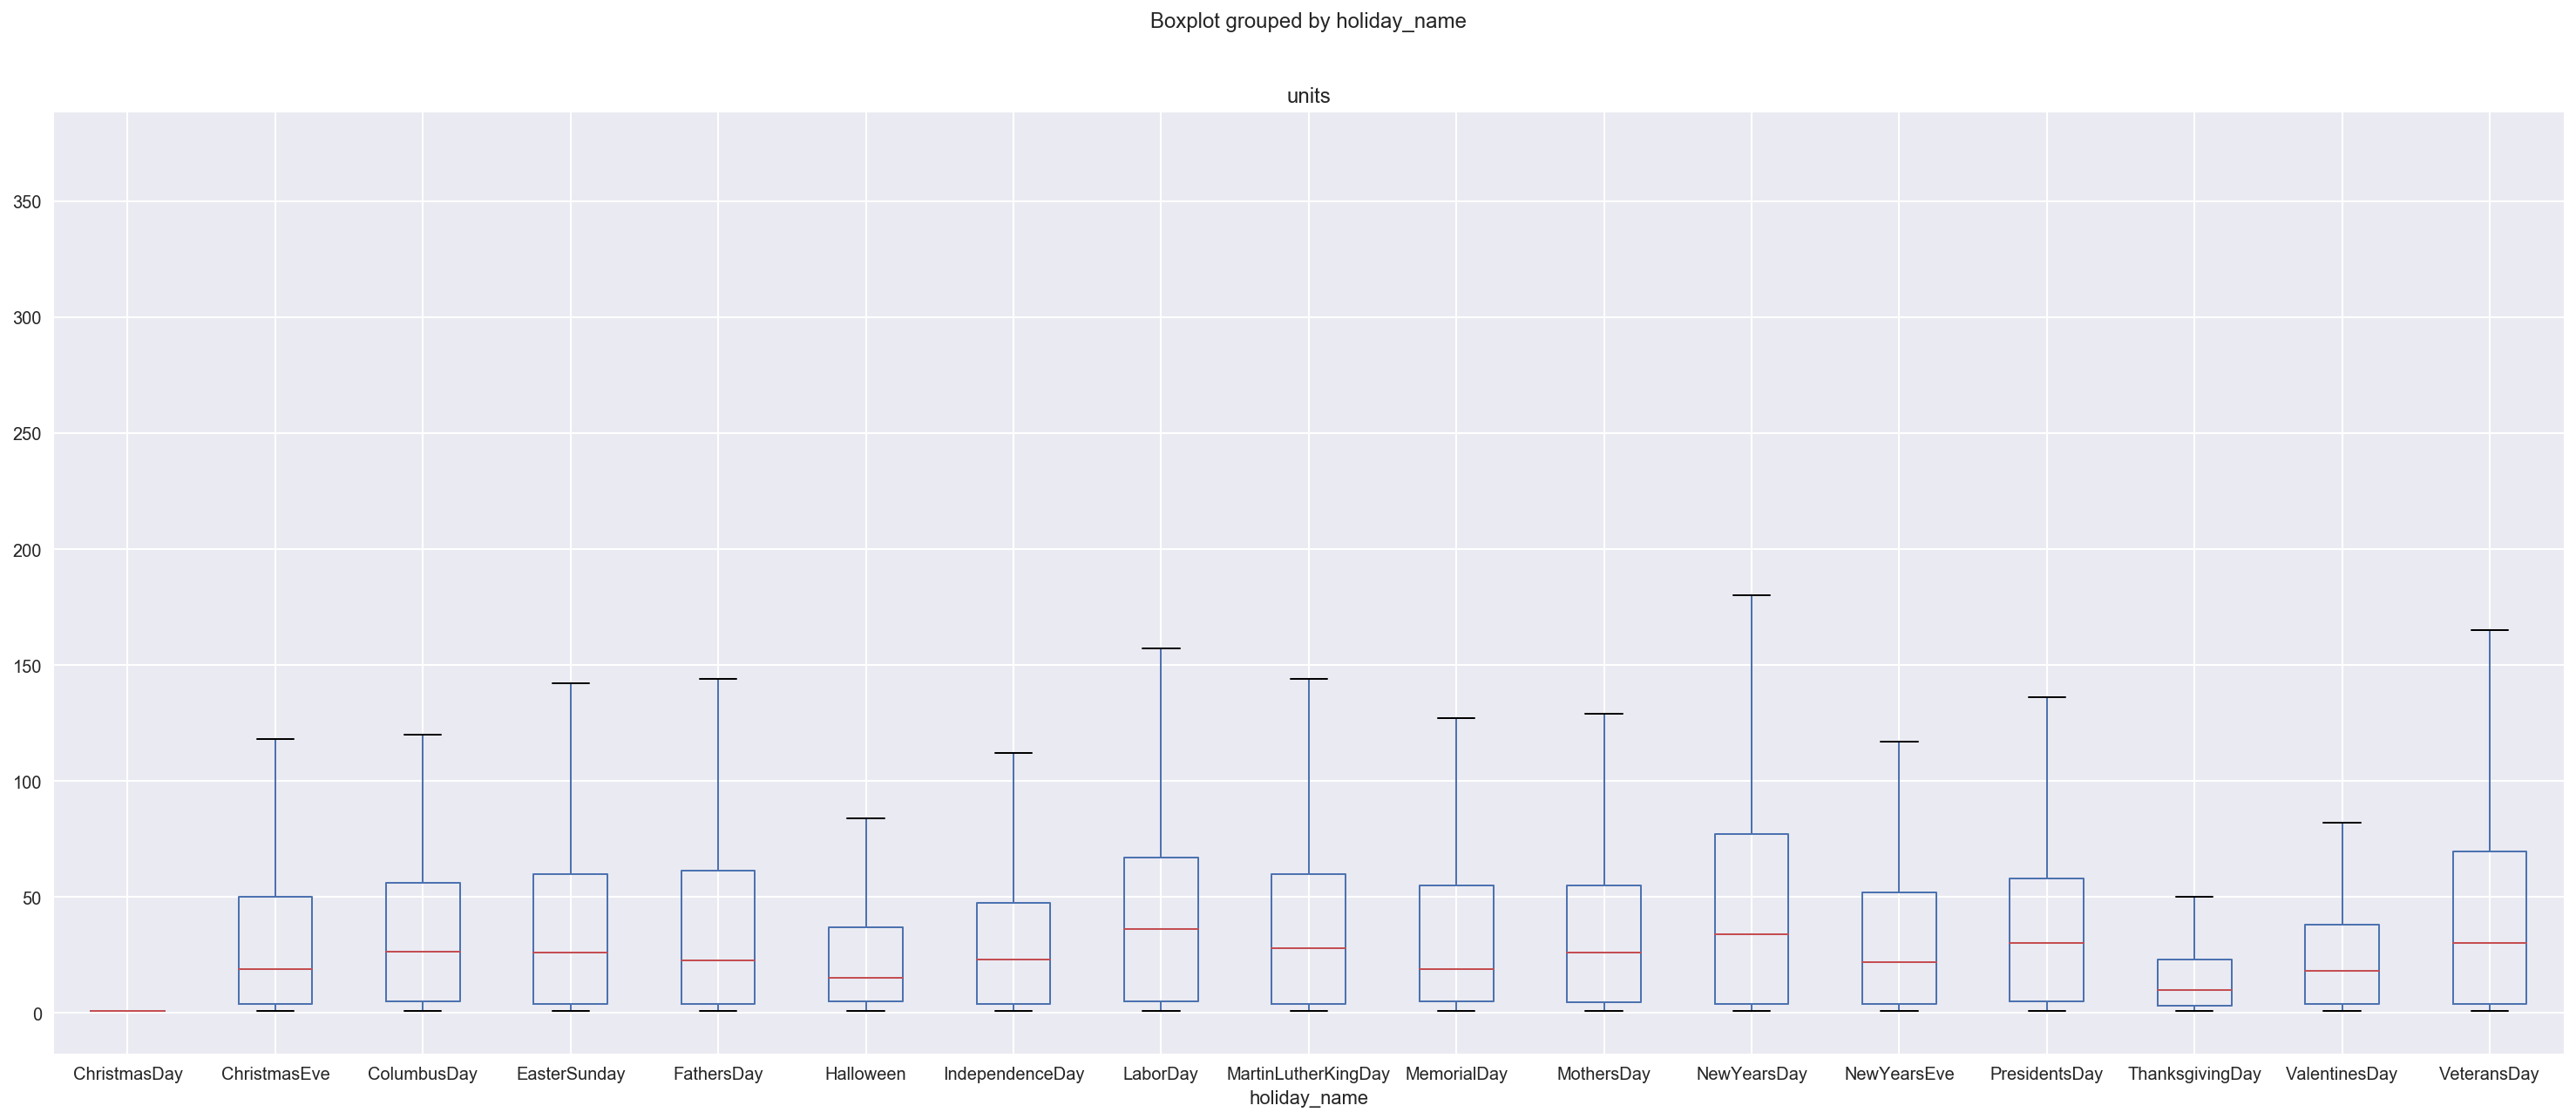

In [46]:
result.boxplot("units", "holiday_name", figsize=(25, 10))
plt.show()

In [51]:
model_2 = sm.OLS.from_formula("units ~ store_nbr + station_nbr + item_nbr + tmax + tmin + tavg + depart + dewpoint + wetbulb + heat + cool + sunrise + sunset + snowfall + preciptotal + stnpressure + sealevel + resultspeed + resultdir + avgspeed", data=result)
print(model_2.fit().summary()) 
# sunset column 삭제?

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     455.7
Date:                Sat, 10 Mar 2018   Prob (F-statistic):               0.00
Time:                        01:57:54   Log-Likelihood:            -6.2512e+05
No. Observations:              118696   AIC:                         1.250e+06
Df Residuals:                  118676   BIC:                         1.250e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1227      0.019     -6.509      

In [52]:
model_3 = sm.OLS.from_formula("units ~ +FC + BC + BL + BR + DR + DS + DU + DZ + FC + FG + FG+ + FU + FZ + GR + GS + HZ + IC + MI + PL + PO + PR + PO + PR + PY + RA + SA + SG + SH + SN + SQ + TS + UP + VC", data=result)
print(model_3.fit().summary())
# FC, DR, DS, GR, IC, MI, PO, PR, PY, SA, SG, SQ 삭제?

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     21.43
Date:                Sat, 10 Mar 2018   Prob (F-statistic):           5.61e-82
Time:                        02:03:13   Log-Likelihood:            -6.2907e+05
No. Observations:              118696   AIC:                         1.258e+06
Df Residuals:                  118674   BIC:                         1.258e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.3942      0.178    220.751      0.0

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [53]:
model_4 = sm.OLS.from_formula("units ~ BC + BL + BR + DU + DZ + FC + FG + FG+ + FU + FZ + GS + HZ + PL + RA + SH + SN + TS + UP + VC", data=result)
print(model_4.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     28.05
Date:                Sat, 10 Mar 2018   Prob (F-statistic):           2.97e-85
Time:                        02:07:39   Log-Likelihood:            -6.2907e+05
No. Observations:              118696   AIC:                         1.258e+06
Df Residuals:                  118679   BIC:                         1.258e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.3968      0.178    220.853      0.0

In [55]:
model_5 = sm.OLS.from_formula("units ~ store_nbr + station_nbr + item_nbr + tmax + tmin + tavg + depart + dewpoint + wetbulb + heat + cool + sunrise + snowfall + preciptotal + stnpressure + sealevel + resultspeed + resultdir + avgspeed + BC + DZ + FG + FU + HZ + PL + RA + SH + SN + TS + VC", data=result)
print(model_5.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     314.1
Date:                Sat, 10 Mar 2018   Prob (F-statistic):               0.00
Time:                        02:12:22   Log-Likelihood:            -6.2505e+05
No. Observations:              118696   AIC:                         1.250e+06
Df Residuals:                  118667   BIC:                         1.250e+06
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1064      0.019     -5.599      

In [64]:
model_6 = sm.OLS.from_formula("units ~ store_nbr + station_nbr + item_nbr + scale(tmax) + scale(tmin) + scale(tavg) + scale(depart) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool) + scale(sunrise) + scale(snowfall) + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed) + scale(resultdir) + scale(avgspeed) + BC + DZ + FG + FU + HZ + PL + RA + SH + SN + TS + VC", data=result)
print(model_6.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     314.1
Date:                Sat, 10 Mar 2018   Prob (F-statistic):               0.00
Time:                        02:49:45   Log-Likelihood:            -6.2505e+05
No. Observations:              118696   AIC:                         1.250e+06
Df Residuals:                  118667   BIC:                         1.250e+06
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             52.5053      0

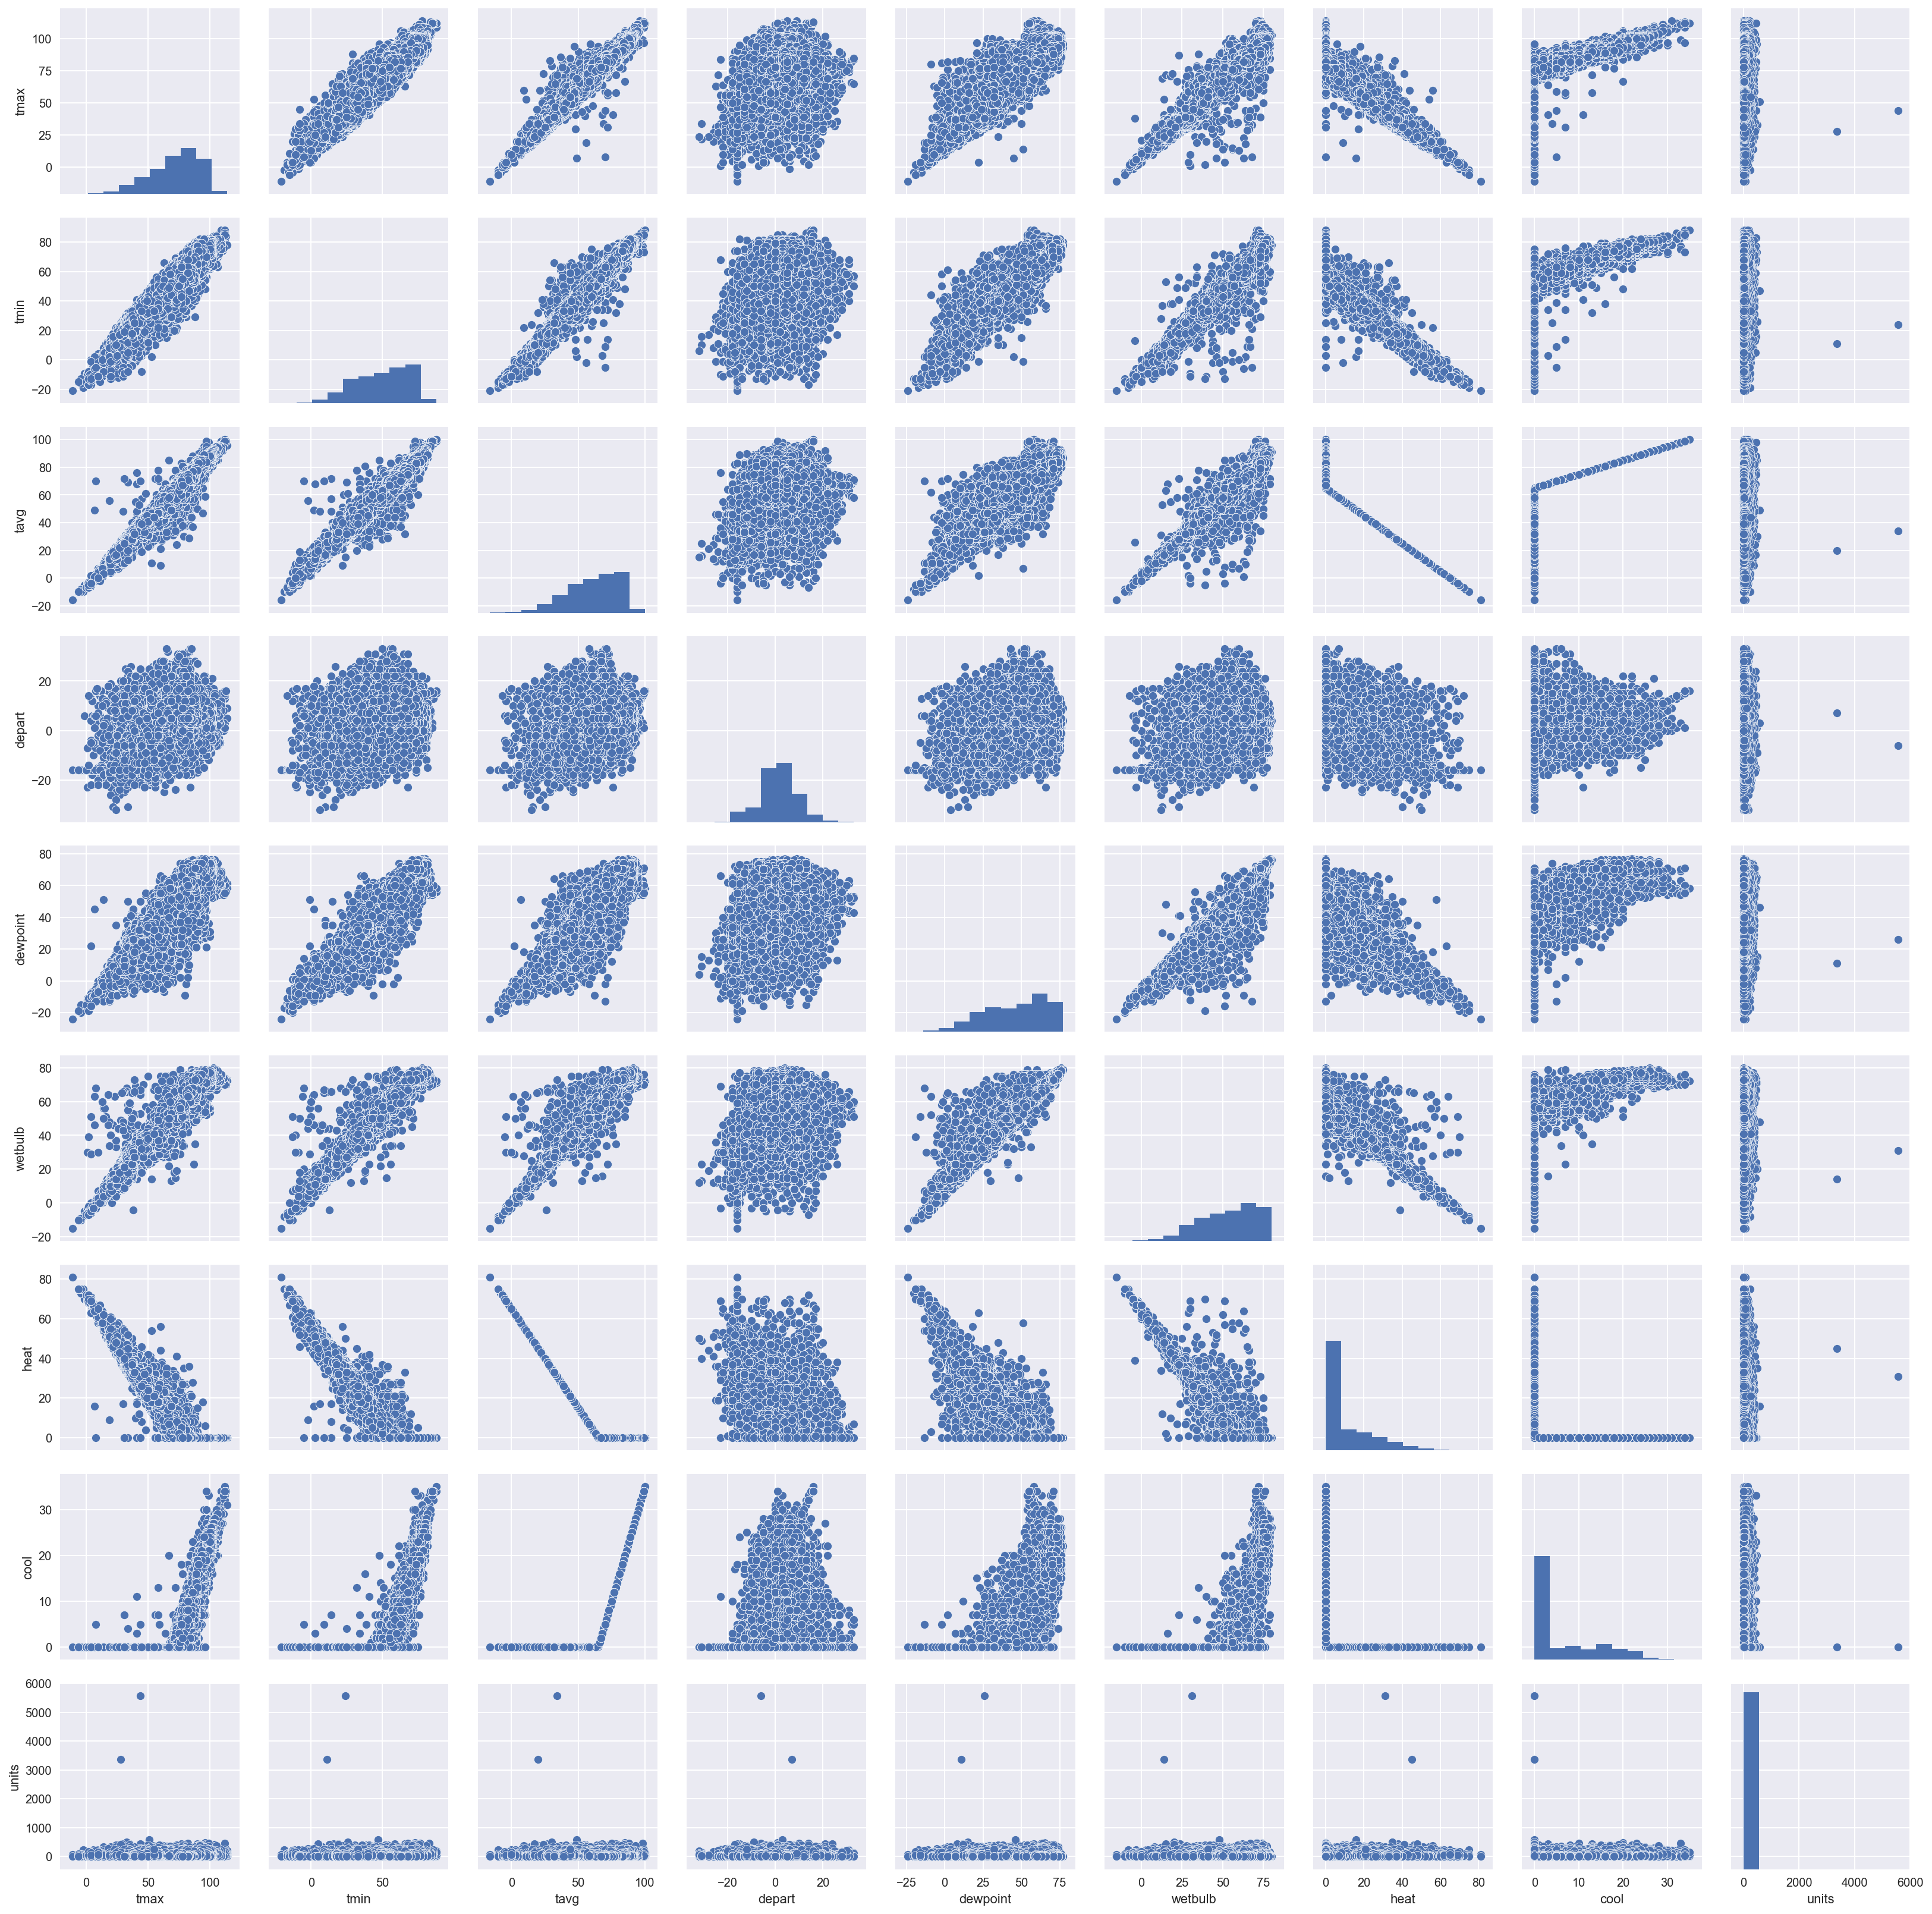

In [60]:
cols = ['tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'units']
sns.pairplot(result[cols])
plt.show()

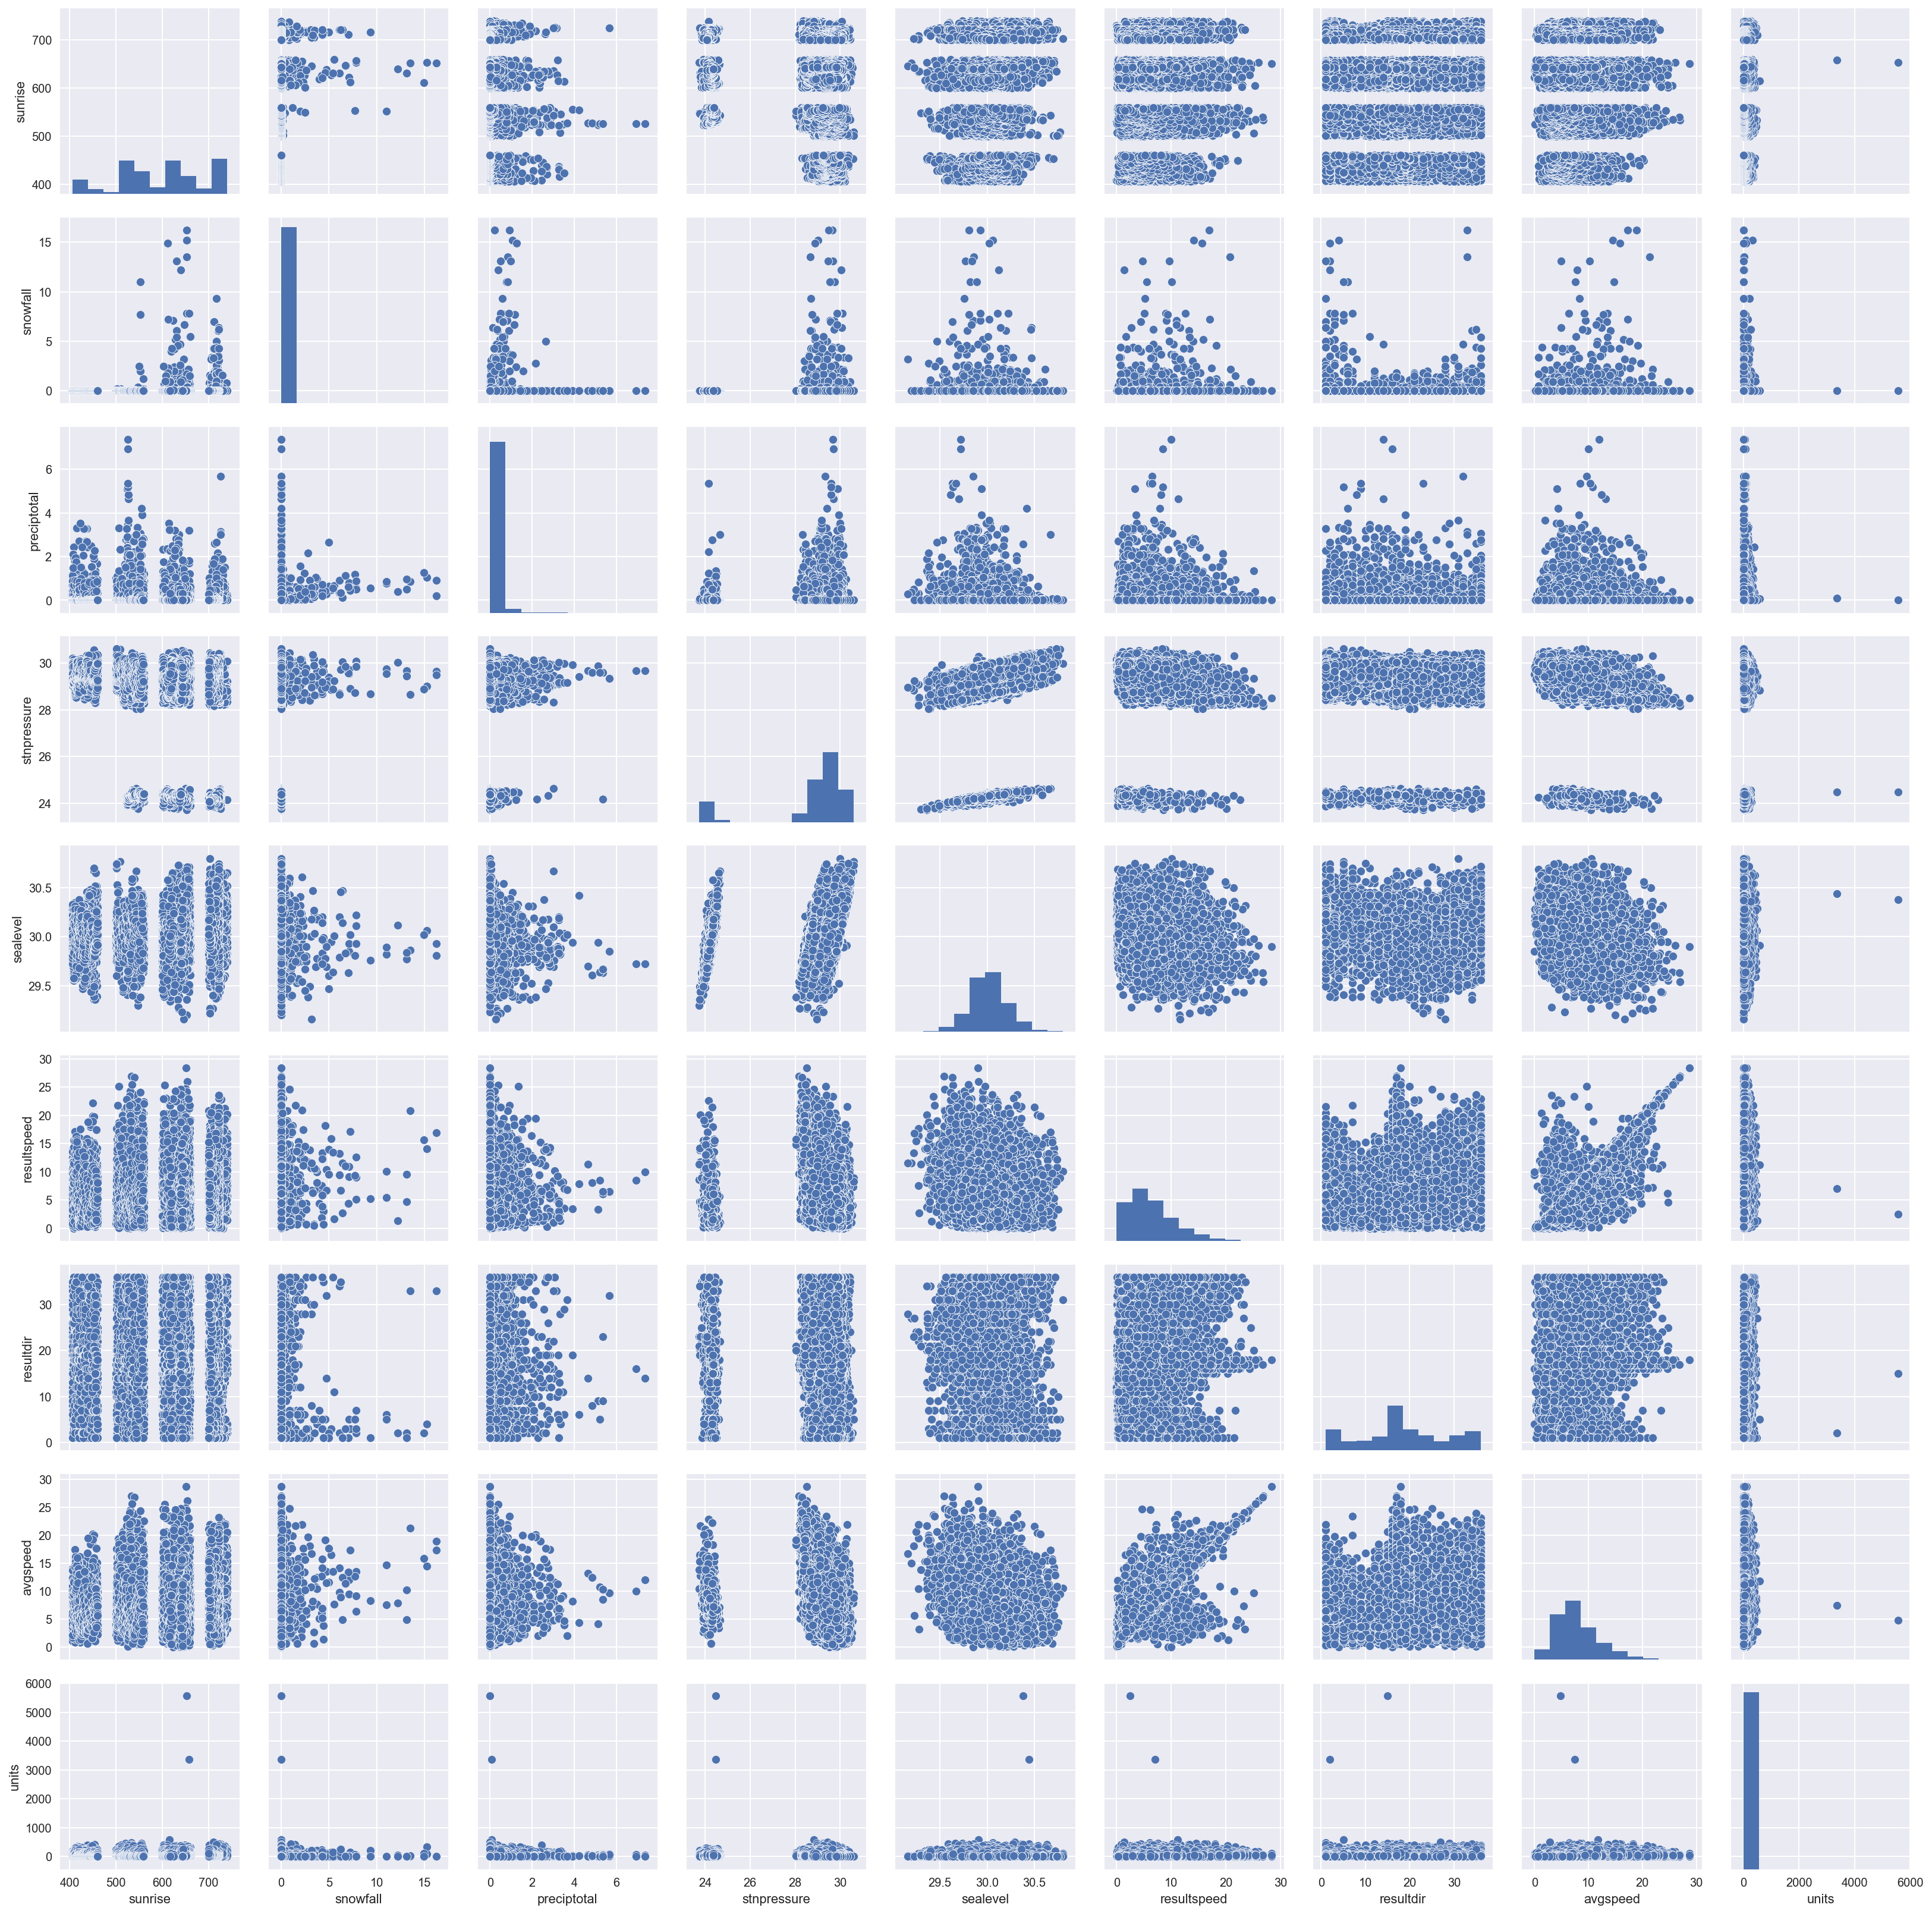

In [61]:
cols_2= ['sunrise', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed', 'units']
sns.pairplot(result[cols_2])
plt.show()

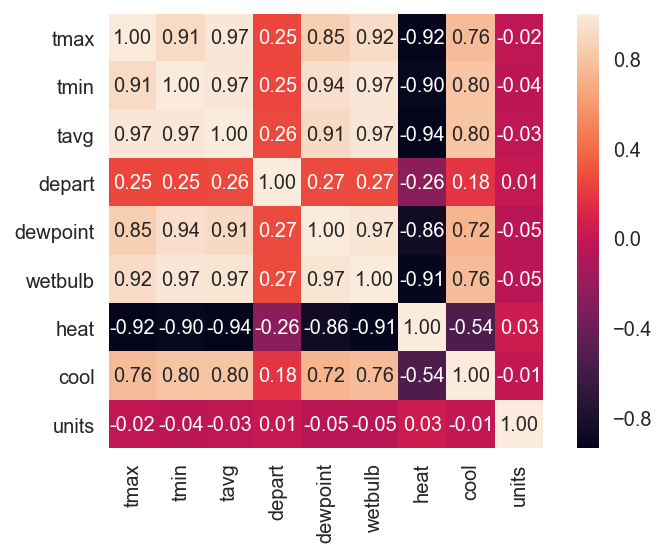

In [68]:
cm = np.corrcoef(result[cols].values.T)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=cols, xticklabels=cols)
plt.show()

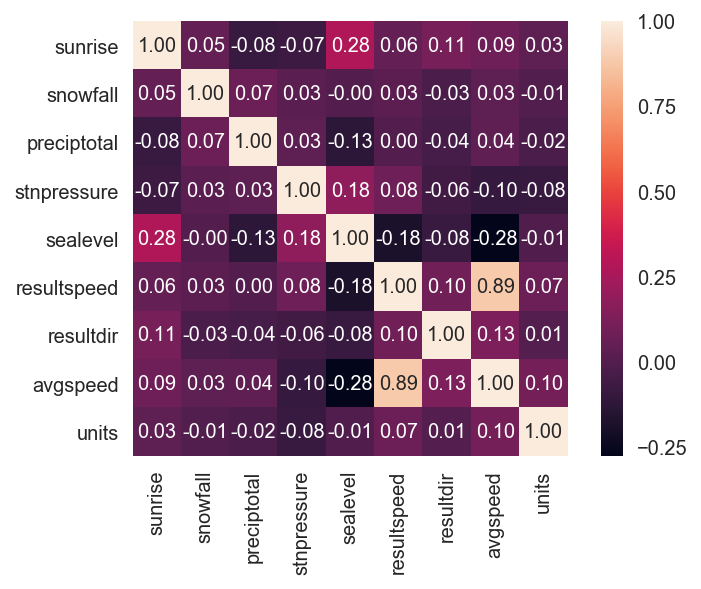

In [69]:
cm2 = np.corrcoef(result[cols_2].values.T)
sns.heatmap(cm2, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=cols_2, xticklabels=cols_2)
plt.show()